## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [102]:
import pandas as pd 
import numpy as np 
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
flights_df = pd.read_csv('flights.csv')
fuel_df = pd.read_csv('fuel_consumption.csv')
passengers_df= pd.read_csv('passengers.csv')

In [104]:
flights_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,...,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,...,175,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,...,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,...,250,0.0,19.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,...,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
status =[]
for value in flights_df['arr_delay']:
    if value < 0:
        status.append(0)
    else: 
        status.append(1)
flights_df['flight_status'] = status 
flights_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,flight_status
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,...,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,1
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,...,0.0,19.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,1
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [106]:
flights_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'flight_status'],
      dtype='object')

/Users/julie_hong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

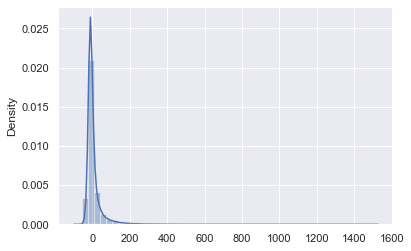

In [107]:
#Arrival Delay
sns.distplot(x=flights_df.arr_delay)

/Users/julie_hong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

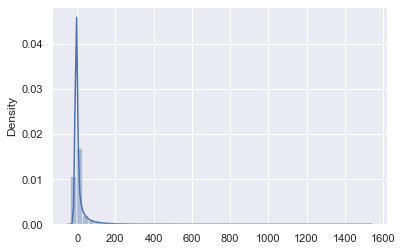

In [108]:
#Arrival Delay
sns.distplot(x=flights_df.dep_delay)

## Removing outliers 

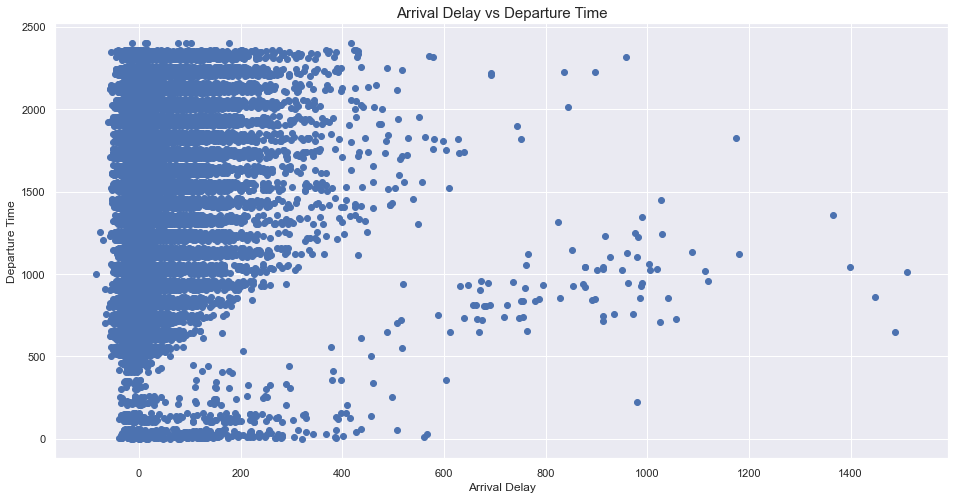

In [109]:
#Scatter plot of Arrival Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights_df['arr_delay'], flights_df['dep_time'])
ax.set_xlabel('Arrival Delay')
ax.set_ylabel('Departure Time')
plt.title("Arrival Delay vs Departure Time", size=15)
plt.show()

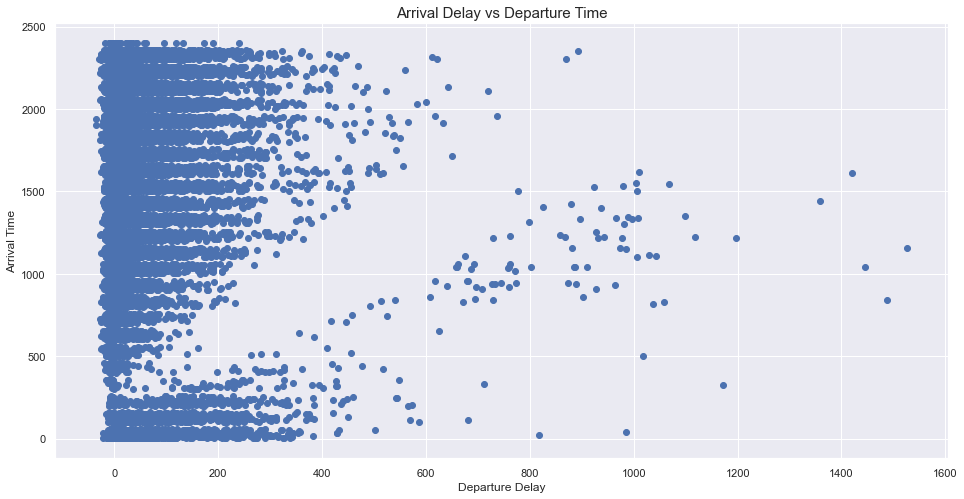

In [110]:
#Scatter plot of Dep Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights_df['dep_delay'], flights_df['arr_time'])
ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Time')
plt.title("Arrival Delay vs Departure Time", size=15)
plt.show()

In [111]:
#Removing the Outliers
flights_df = flights_df.loc[(flights_df['arr_delay'] <= 350)\
                                 & (flights_df['arr_delay'] >= -100)]
flights_df = flights_df.loc[(flights_df['dep_delay'] <=350)\
                                            & (flights_df['dep_delay'] >=-100)]

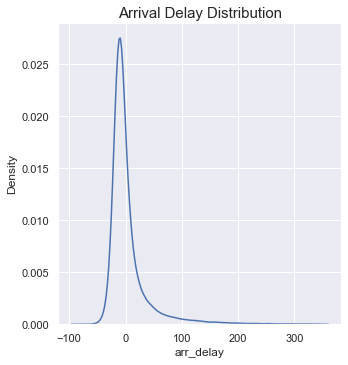

In [112]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_df, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

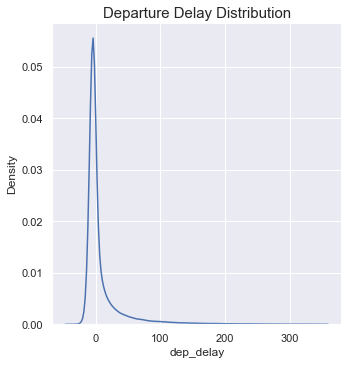

In [113]:
# Departure Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_df, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [114]:
flights_df['month'] = pd.DatetimeIndex(flights_df['fl_date']).month

In [115]:
arr_delay = flights_df.groupby('month')['arr_delay'].mean()

In [116]:
dep_delay = flights_df.groupby('month')['dep_delay'].mean()

Text(0.5, 1.0, 'Average Arrival Delay Per Month')

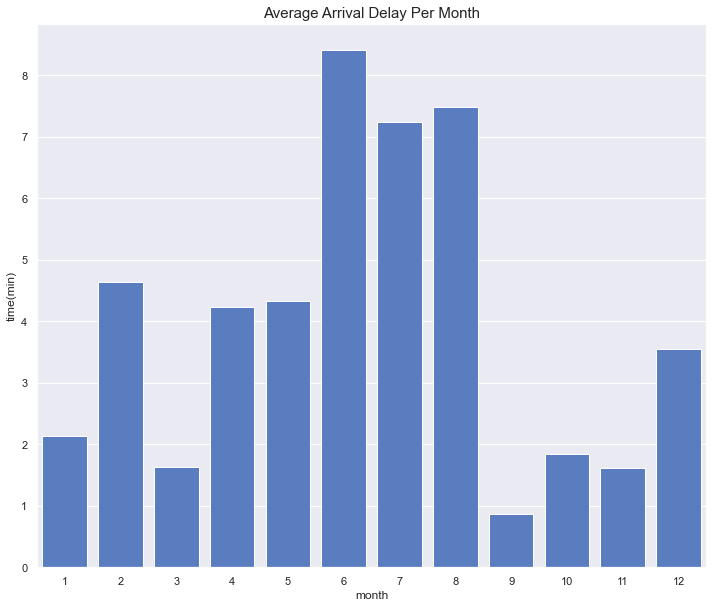

In [117]:
#mean of arrival dealy for each month
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("muted")
ax.set(xlim=(0, 100), ylabel="time(min)")
sns.barplot(x=arr_delay.index, y=arr_delay.values, color="b")
plt.title("Average Arrival Delay Per Month", size=15)

Text(0.5, 1.0, 'Average Departure Delay Per Month')

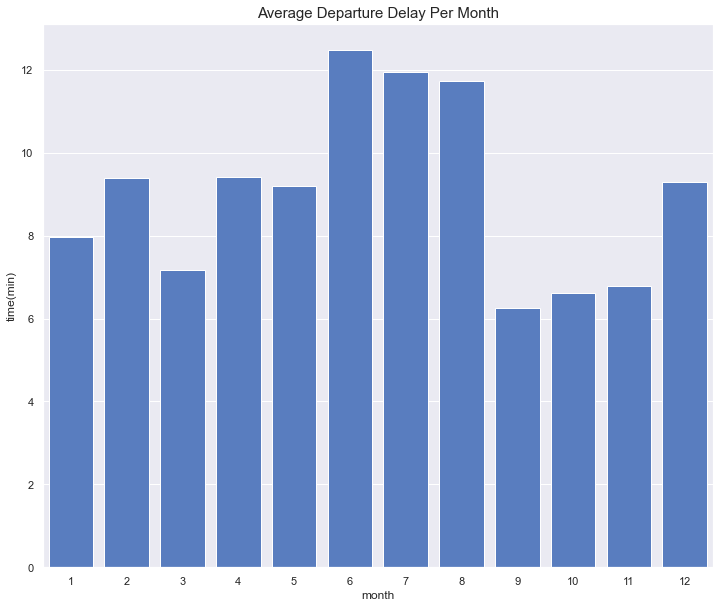

In [118]:
#mean of departure dealy for each month
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("muted")
ax.set(xlim=(0, 100), ylabel="time(min)")
sns.barplot(x=dep_delay.index, y=dep_delay.values, color="b")
plt.title("Average Departure Delay Per Month", size=15)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [133]:
#function to change integer time to standard time in string
def time_row(row):
    row_int = int(row)
    row_str = str(row_int)
    len_row = len(row_str)
    if len_row == 1:
        minute = '00'
        hour = row_str
        row = hour + ':' + minute
    if len_row == 2:
        minute =  '0'+ row_str[1]
        hour = row_str[0]
        row = hour + ':' + minute
    if len_row == 3:
        minute = row_str[1]+row_str[2]
        hour = row_str[0]
        row = hour + ':' + minute
    elif len_row == 4:
        minute = row_str[2] + row_str[3]
        hour = row_str[0] + row_str[1]
        row = hour + ':' + minute
        if row == '24:00':
            row = '23:59'
    return str(row)

In [129]:

#applyting the function and changing to format to date and time
flights_df['dep_time_format'] = flights_df['dep_time'].apply(time_row)

flights_df['dep_time_format'] = pd.to_datetime(\
                                                       flights_df['dep_time_format'],\
                                                       format='%H:%M').dt.time

taxi_out_mean_hour = flights_df.groupby(by=[flights_df\
                                                    .dep_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_out'].mean()
number_of_departures = flights_df.groupby(by=[flights_df.dep_time_format.map(lambda x : (x.hour))])['taxi_out'].count()

In [134]:
flights_df.dep_time_format

0        16:28:00
1        17:32:00
2        09:49:00
3        14:01:00
4        17:05:00
           ...   
99995    18:57:00
99996    15:15:00
99997    17:47:00
99998    14:48:00
99999    18:29:00
Name: dep_time_format, Length: 97726, dtype: object

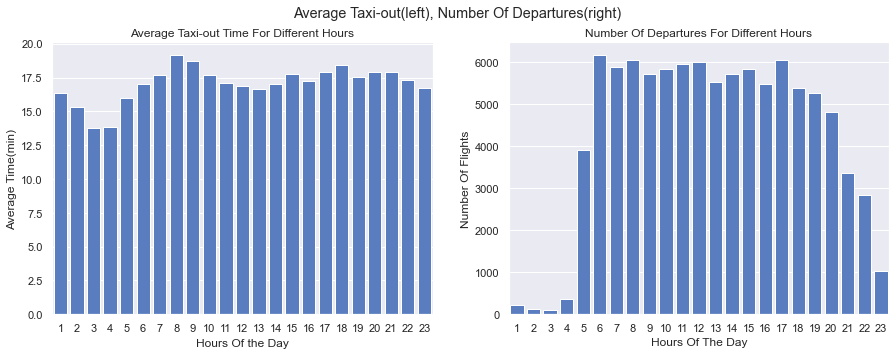

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Average Taxi-out(left), Number Of Departures(right)')

sns.barplot(ax=axes[0], x=taxi_out_mean_hour.index, y=taxi_out_mean_hour.values,color='b')
axes[0].set_title('Average Taxi-out Time For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Average Time(min)')
#number of flights
sns.barplot(ax=axes[1], x=number_of_departures.index, y=number_of_departures.values,color='b')
axes[1].set_title('Number Of Departures For Different Hours')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')

plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [120]:
no_arr_delay = flights_df[(flights_df['arr_delay'] == 0) & (flights_df['dep_delay'] > 0)].dep_delay.sum()
all_dep_delays =  flights_df[(flights_df['dep_delay'] >=0)].dep_delay.sum()
percentage = (no_arr_delay)/(all_dep_delays) * 100
print("Percentage of delays created before departure:", percentage)

Percentage of delays created before departure: 0.46514129225219564


#### **Task 6**: How many states cover 50% of US air traffic? 

In [121]:
top_states = flights_df.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).head(17)
sum_top_number_flights = top_states.values.sum()
total_number_flights = flights_df.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).sum()

In [122]:
top_states

origin_city_name
Chicago, IL              5832
Atlanta, GA              4882
New York, NY             3637
Dallas/Fort Worth, TX    3527
Denver, CO               3373
Los Angeles, CA          3219
Charlotte, NC            3068
Washington, DC           2989
Houston, TX              2795
Seattle, WA              2359
Phoenix, AZ              2256
Detroit, MI              2224
San Francisco, CA        2210
Las Vegas, NV            2112
Minneapolis, MN          2021
Newark, NJ               1909
Boston, MA               1901
Name: taxi_in, dtype: int64

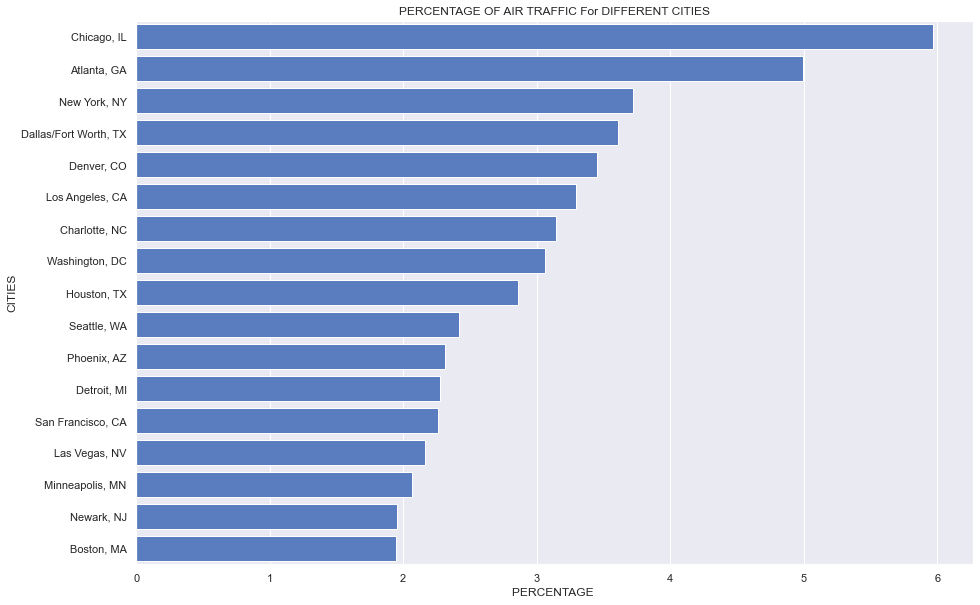

In [123]:
fig, axes = plt.subplots(figsize=(15,10))
sns.barplot(ax=axes, x=(top_states.values/total_number_flights)*100, y=top_states.index,color='b')
axes.set_title('PERCENTAGE OF AIR TRAFFIC For DIFFERENT CITIES')
axes.set_xlabel('PERCENTAGE ')
axes.set_ylabel('CITIES')
plt.show()

In [124]:
#total percentage contribution from 18 states
percentage = sum_top_number_flights/total_number_flights* 100
percentage

51.507954382588395

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [137]:
distance = flights_df['distance']
airtime = flights_df['air_time']
flights_df['average speed'] = distance/airtime*60
flights_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,flight_status,month,dep_time_format,average speed
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,0,11,16:28:00,160.645161
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,...,0.0,24.0,NaN,NaN,NaN,NaN,1,12,17:32:00,308.823529
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,...,NaN,NaN,NaN,NaN,NaN,NaN,1,10,09:49:00,436.200000
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,...,0.0,0.0,NaN,NaN,NaN,NaN,1,6,14:01:00,348.837209
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,0,11,17:05:00,466.423358


#### Reject null hypothesis 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [125]:
flights_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'flight_status', 'month'],
      dtype='object')

In [126]:
flights_df.air_time.describe()

count    97682.000000
mean       108.241078
std         70.320708
min         10.000000
25%         57.000000
50%         89.000000
75%        138.000000
max        692.000000
Name: air_time, dtype: float64

In [127]:
short_flight = flights_df[(flights_df.air_time <= 60)]
med_flight = flights_df[(flights_df['air_time'] >= 60) & flights_df['air_time'] <= 140]
long_flight = flights_df[(flights_df.air_time>140)]

In [155]:
short_flights_time = short_flight.groupby(by=[short_flight.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
med_flights_time = med_flight.groupby(by=[med_flight.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
long_flights_time = long_flight.groupby(by=[long_flight.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'dep_time_format'

In [154]:
flights_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'flight_status', 'month',
       'dep_time_format', 'average speed'],
      dtype='object')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [165]:
airports_origin = pd.DataFrame(
    flights_df.groupby(['origin','origin_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)
airports_destination = pd.DataFrame(
    flights_df.groupby(['dest','dest_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)

In [175]:
airports_origin= airports_origin.sort_values(by='flight_count',ascending=False).head(10)

In [173]:
airports_destination=airports_destination.sort_values(by='flight_count',ascending=False).head(10)

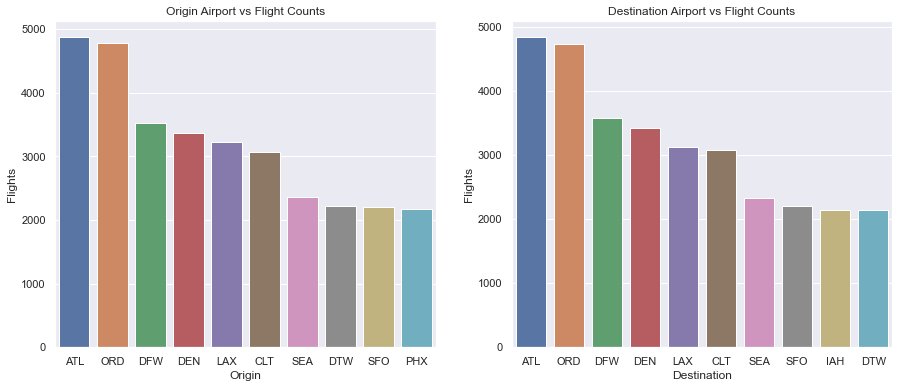

In [176]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='flight_count', data=airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='flight_count', data=airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Flight Counts', xlabel='Origin', ylabel='Flights')
ax2.set(title='Destination Airport vs Flight Counts', xlabel='Destination', ylabel='Flights');


In [178]:
passengers_df.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [182]:
passengers_origin = pd.DataFrame(passengers_df.groupby(['origin','origin_city_name'])['passengers'].sum().reset_index()).rename({'passengers':'total_passengers'}, axis=1)
passengers_dest = pd.DataFrame(passengers_df.groupby(['dest','dest_city_name'])['passengers'].sum().reset_index()).rename({'passengers':'total_passengers'}, axis=1)

In [190]:
passengers_origin = passengers_origin.sort_values(by='total_passengers',ascending=False).head(10)
passengers_dest = passengers_dest.sort_values(by='total_passengers',ascending=False).head(10)
passengers_origin.head()

,origin,origin_city_name,total_passengers
88,ATL,"Atlanta, GA",10480165
703,LAX,"Los Angeles, CA",8893338
939,ORD,"Chicago, IL",8357252
313,DFW,"Dallas/Fort Worth, TX",6701955
614,JFK,"New York, NY",6513840


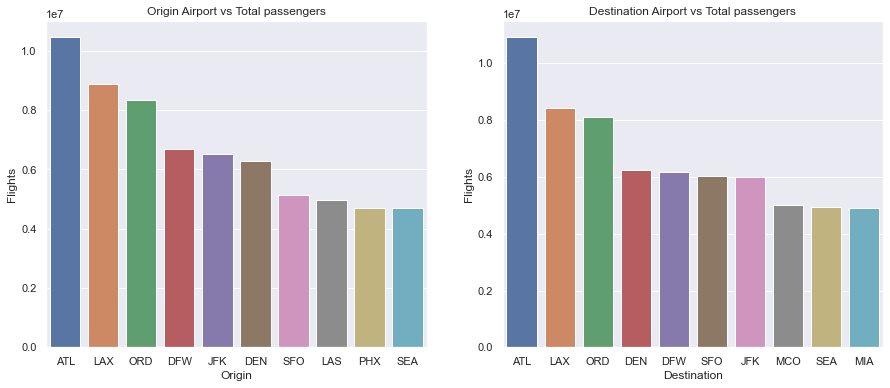

In [191]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='total_passengers', data=passengers_dest, ax=axes[1])

ax1.set(title='Origin Airport vs Total passengers', xlabel='Origin', ylabel='Flights')
ax2.set(title='Destination Airport vs Total passengers', xlabel='Destination', ylabel='Flights');



#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [209]:
# average monthly delay per carrier 
avg_delay = flights_df.groupby(['mkt_unique_carrier','month'])['dep_delay'].mean()
avg_delay = pd.DataFrame(avg_delay).reset_index()
avg_delay

,mkt_unique_carrier,month,dep_delay
0,AA,1,6.615153
1,AA,2,8.468836
2,AA,3,6.783074
3,AA,4,6.220829
4,AA,5,10.635570
...,...,...,...
118,WN,8,11.055014
119,WN,9,6.779010
120,WN,10,9.324164
121,WN,11,7.754098


In [213]:
# average distance covered monthly 
avg_dist = flights_df.groupby(['mkt_unique_carrier','month'])['distance'].mean()
avg_dist = pd.DataFrame(avg_dist).reset_index()
avg_dist

,mkt_unique_carrier,month,distance
0,AA,1,689.409433
1,AA,2,699.784887
2,AA,3,680.578307
3,AA,4,698.476374
4,AA,5,699.687500
...,...,...,...
118,WN,8,737.554318
119,WN,9,724.858832
120,WN,10,734.458736
121,WN,11,762.037776


In [244]:
# total passengers per airline 
total_cust = passengers_df.groupby('unique_carrier_name')['passengers'].sum()
total_cust = pd.DataFrame(total_cust).reset_index()
total_cust

,unique_carrier_name,passengers
0,40-Mile Air,208
1,ABC Aerolineas SA de CV dba Interjet,272655
2,ABS JETS A.S,16
3,ABSA-Aerolinhas Brasileiras,0
4,ABX Air Inc,0
...,...,...
356,XL Airways France,28236
357,XTRA Airways,35567
358,"Xiamen Airlines Co., Ltd.",32203
359,Yangtze River Express Airlines Company,0


In [246]:
# Find out total fuel comsumption per air carrier.
fuel_df.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [249]:
total_fuel = fuel_df.groupby('unique_carrier')['total_gallons'].sum()
total_fuel = pd.DataFrame(total_fuel).reset_index()
total_fuel

,unique_carrier,total_gallons
0,09Q,41034111.0
1,0JQ,838615.0
2,0WQ,3253401.0
3,1BQ,6672792.0
4,23Q,856284.0
...,...,...
57,X9,176878857.0
58,XP,19013295.0
59,YV,0.0
60,YX,287098389.0


Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [254]:
flights_df.to_csv(r'flights.csv')